In [1]:
#imports
import pandas as pd
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Analyse Checkv Quality Report

In [2]:

checkvReportDir_viral = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/checkv" #HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/quality_summary.tsv"


checkvReportDir_host_removed = "/lustre/shared/wfsr-mcfa/projects/internships/luka/viral_metagenomics_pipeline/results/checkv/host_removed"# HCFKNDSX3_104762-001-002_44_TTAATCAG-CAGATTGG_L004/quality_summary.tsv"
# checkvReport_viral_only = pd.read_csv(checkvReportDir_viral, sep="\t")
# checkvReport_host_removed = pd.read_csv(checkvReportDir_host_removed , sep="\t")



In [3]:


def get_mean_contig_len(checkv_dir):

    """
    Calculate mean contig length and count the number of medium to complete genomes for each sample in a directory.

    Parameters:
    checkv_dir (str): The directory containing sample subdirectories, each with a "quality_summary.tsv" file.

    Returns:
    list: A list of mean contig lengths for each sample.
    list: A list of counts for medium to complete genomes for each sample.
    list: A list of sample names.
    """
    
    mean_contig_length = []
    all_quality = []
    samples = []

    # Iterate through subdirectories in checkv_dir
    for sample in os.listdir(checkv_dir):
        
        
        ignore_dir = ['checkv-db-v1.5', "host_removed"]
        
        if sample in  ignore_dir:
            continue
        #print(dir)

        # read in the checkv quality report
        checkv_df = pd.read_csv(os.path.join(checkv_dir, sample, "quality_summary.tsv"), sep="\t")
        
        # pick the sample mean contig len
        sample_mean_contig_length = checkv_df['contig_length'].mean()
        mean_contig_length.append(sample_mean_contig_length)

        #pick the number of medium to complete genomes
        sample_quality = checkv_df.query("checkv_quality == 'Medium-quality' | checkv_quality == 'High-quality' | \
        checkv_quality == 'Complete'").shape[0]

        all_quality.append(sample_quality)

        #add sample label
        samples.append(sample)

                                                                
        
        #print(sample, sample_quality)
    
    #create the necessary df
    

        

    return mean_contig_length, all_quality, samples
    #break







In [4]:
# how many contigs were longer than 2kb?
def get_num_over2kb_contigs(checkv_dir):

    """
    Count the number of contigs with a length greater than or equal to 2kb for each sample in a directory.

    Parameters:
    checkv_dir (str): The directory containing sample subdirectories, each with a "quality_summary.tsv" file.

    Returns:
    list: A list of counts of contigs greater than or equal to 2kb for each sample.
    """

    
    over2kb = []
    for sample in os.listdir(checkv_dir):
        
        
        ignore_dir = ['checkv-db-v1.5', "host_removed"]
        
        if sample in  ignore_dir:
            continue
        #print(dir)

        # read in the checkv quality report
        checkv_df = pd.read_csv(os.path.join(checkv_dir, sample, "quality_summary.tsv"), sep="\t")
        
        # pick the numbe of contigs >= 2kb
        sample_over2kb = checkv_df.query("contig_length >= 2000").shape[0]

        over2kb.append(sample_over2kb)

                                                                
        
        #print(sample, sample_quality)

        

    return over2kb

In [5]:
viral_only_contig_len, viral_good_quality, samples = get_mean_contig_len(checkvReportDir_viral)

host_removed_contig_len, host_removed_good_quality, samples = get_mean_contig_len(checkvReportDir_host_removed)

In [6]:
over2kb_viral_only = get_num_over2kb_contigs(checkvReportDir_viral)
sum(over2kb_viral_only)

27

In [7]:
over2kb_host_removed = get_num_over2kb_contigs(checkvReportDir_host_removed)
sum(over2kb_host_removed)

1879

In [9]:

contigs_len = pd.DataFrame({
    'viruses_only': viral_only_contig_len,
    'host_exclusion': host_removed_contig_len
})
contigs_len.head(20)

,viruses_only,host_exclusion
0,414.753247,391.512302
1,386.579281,392.992876
2,395.635135,380.497641
3,394.033898,376.342349
4,418.277533,412.726460
5,403.719128,394.331855
6,345.441962,398.038188
7,431.631902,406.481628
8,430.290698,387.978686
9,416.235821,408.492110


In [13]:
# check quantiles (Q1)
contigs_len.quantile(0.25)

viruses_only      392.116503
host_exclusion    391.882445
Name: 0.25, dtype: float64

In [14]:
# check quantiles (Q3)
contigs_len.quantile(0.75)

viruses_only      421.179960
host_exclusion    408.093704
Name: 0.75, dtype: float64

In [10]:
#what is the mean of contig lens
viral_only_average_len = contigs_len['viruses_only'].mean()
host_excluded_average_len =  contigs_len['host_exclusion'].mean()
print(f'viral only average length: {viral_only_average_len}\n \
      Host exclusion average length: {host_excluded_average_len}')

viral only average length: 402.7332591913464
       Host exclusion average length: 398.6607148348568


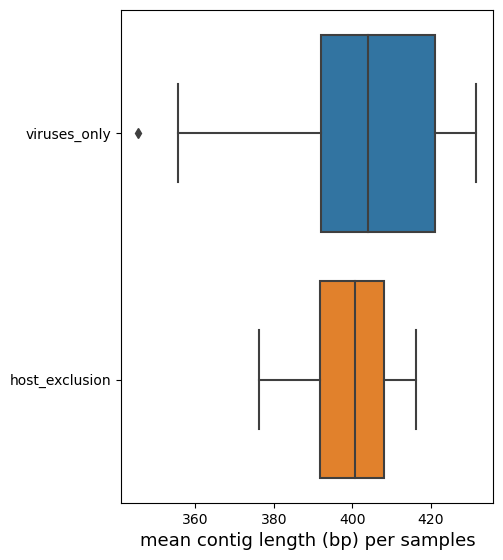

In [12]:
#plot the mean contig len
plt.figure(figsize=(4.8,6.4),dpi=100)
ax = sns.boxplot(data=contigs_len, orient='h',
             showmeans = False)#palette= [sns.color_palette("colorblind")[6],sns.color_palette("colorblind")[5]],


plt.xlabel('mean contig length (bp) per samples', fontsize=13)
plt.savefig('../supplimentary_data/mean_contig_len.png',format='png',
           transparent=False,bbox_inches = 'tight')
plt.show()

In [12]:
good_quality = pd.DataFrame({
    'sample': samples,
    'viruses_only': viral_good_quality,
    'host_exclusion': host_removed_good_quality

})
good_quality.head(20)
good_quality.to_csv("../supplimentary_data/checkv_good_quality_per_sample.csv", columns=good_quality.columns)

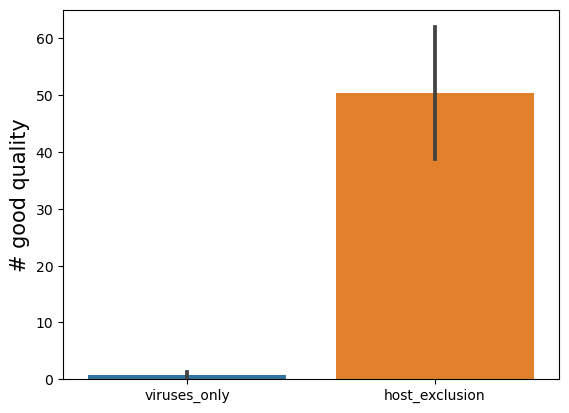

In [13]:
plt.figure(figsize=(6.4,4.8),dpi=100)
ax = sns.barplot(data=good_quality, 
             )#palette= [sns.color_palette("colorblind")[6],sns.color_palette("colorblind")[5]],


plt.ylabel('# good quality', fontsize=15)
plt.savefig('../supplimentary_data/good_contigs.png',format='png',
           transparent=False,bbox_inches = 'tight')
plt.show()